https://www.kaggle.com/datasets/tanuprabhu/linear-regression-dataset?resource=download

In [18]:
!pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 3.3 MB/s eta 0:00:000:00:01m eta 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("datasets/Linear Regression - Sheet1.csv")

# Step 1
## Explain the dataset and the problem
The dataset contains only two columns: x and y. The x column is an int64 and y column is float64. And it doesn't contain null values.
The dataset was generated specifically to practice linear regression, thus this method will be used to find solution.

In [3]:
df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [4]:
df.tail()

,X,Y
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889
299,300,1.888889


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [7]:
df.shape

(300, 2)

# Step 2
## Descriptive analytics
Both x and y are numerical.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,300.0,150.500000,86.746758,1.000000,75.750000,150.500000,225.250000,300.000000
Y,300.0,102.215556,57.842711,1.888889,52.388889,102.222222,152.055556,201.888889


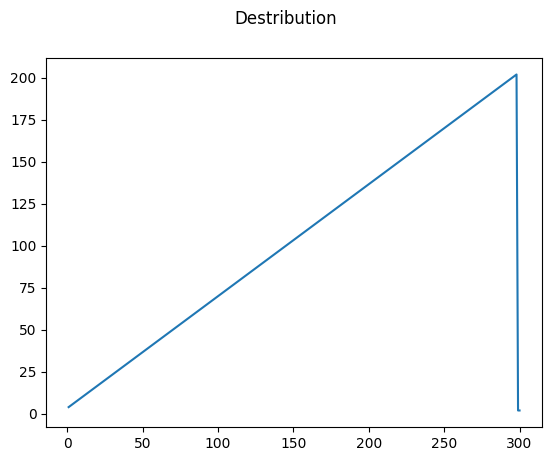

In [9]:
plt.plot(df['X'], df['Y'], label="y = x")
plt.suptitle("Destribution")
plt.show()

# Step 3
## Checking for Missing values
The dataset doesn't contain any missing values.

In [11]:
df.isnull().sum()

X    0
Y    0
dtype: int64

# Step 4
## Outlier detection
As was seen from the data plot previously and df.tail result the dataset contains intentional outliers which need to be dealt with.

,X,Y,z_score
0,1,3.888889,-1.702738
1,2,4.555556,-1.691193
2,3,5.222222,-1.679648
3,4,5.888889,-1.668103
4,5,6.555556,-1.656558
...,...,...,...
295,296,200.555556,1.702968
296,297,201.222222,1.714513
297,298,201.888889,1.726058
298,299,1.888889,-1.737372


# Step 5
## EDA - Feature engineering - One hot encoding - PCA
Not really needed because everything is ready.

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df['X'], df['Y'], test_size=0.2)

In [26]:
y_train

257    175.222222
239    163.222222
54      39.888889
271    184.555556
86      61.222222
          ...    
152    105.222222
125     87.222222
210    143.888889
248    169.222222
171    117.888889
Name: Y, Length: 240, dtype: float64

# Step 6
## Fitting the model and tuning the model's parameters and hyperparameters

In [29]:
x_train = np.array(x_train)
normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis =None)
normalizer.adapt(x_train)

In [32]:
linear_regression_model = tf.keras.Sequential(
    [
        normalizer,
        tf.keras.layers.Dense(units=1)
    ]
)
linear_regression_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 3 (16.00 B)

In [35]:
linear_regression_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [37]:
%%time
history = linear_regression_model.fit(
    x_train,
    y_train,
    epochs=100,
    validation_split=0.2
)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 43.9204 - val_loss: 43.4824
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.3001 - val_loss: 42.8883
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 42.3148 - val_loss: 42.2917
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.8629 - val_loss: 41.6963
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.4723 - val_loss: 41.1000
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.5741 - val_loss: 40.5079
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.5499 - val_loss: 39.9111
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 38.7358 - val_loss: 39.3140
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 36.6946 - val_loss: 38.7225
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.8613 - val_loss: 38.1170
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.9836 - val_loss: 37.5231
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.31

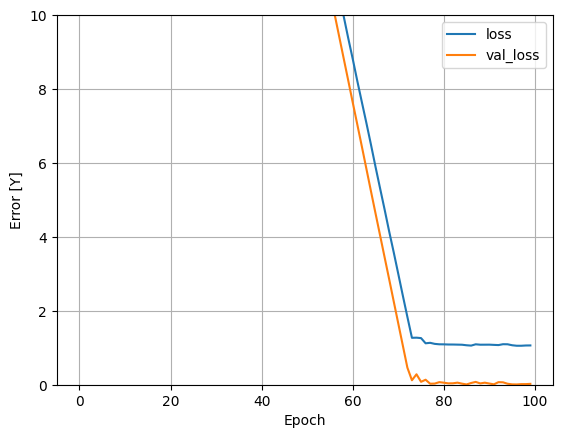

In [42]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Y]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


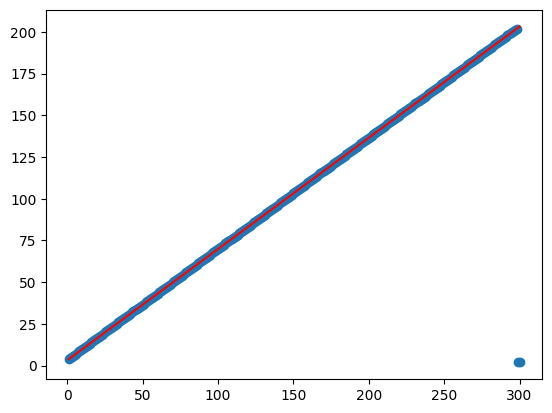

In [48]:
x = df['X']
pred = linear_regression_model.predict(x)
y = df['Y']
plt.scatter(x, y)
plt.plot(x, pred, color='red')

# Step 7
## Model metrics and validation

# Step 8
## Dealing with overfitting and underfitting

# Step 9
## Model Drift